In [1]:
from scipy import stats
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pca


In [2]:
plt.rcParams["figure.figsize"] = (10,5)

In [3]:
dataset= pd.read_csv("dataset.csv")
first = True

for col in dataset.columns:
    if first:
        first = False
        continue

    dataset[col] = dataset[col].apply(lambda x: x.replace(",", "."))
    dataset[col] = dataset[col].astype(float)

In [4]:
dataset_wo_date = dataset.drop("date", axis=1)

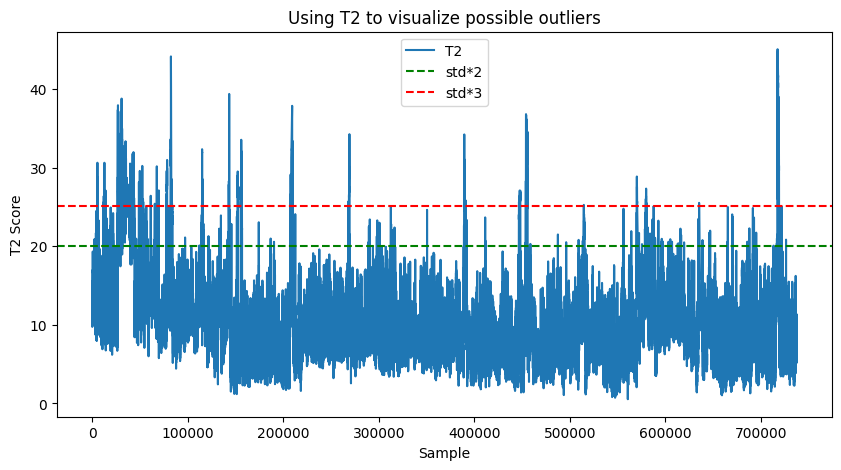

In [6]:
PCA_NUM = 16

model = pca.pca(normalize=True)
out = model.fit_transform(dataset_wo_date, verbose=0)

outliers_hot = pca.hotellingsT2(model.results['PC'].values[:,:PCA_NUM], verbose=0)
scores_t2 = outliers_hot[0]["y_score"]
mean_t2 = scores_t2.mean()
std_t2 = scores_t2.std()
plt.plot(scores_t2, label="T2")
plt.axhline(mean_t2 + 2*std_t2, color='g', linestyle='--', label='std*2')
plt.axhline(mean_t2 + 3*std_t2, color='r', linestyle='--', label='std*3')
plt.legend()
plt.xlabel('Sample')
plt.ylabel('T2 Score')
plt.title('Using T2 to visualize possible outliers')
plt.show()

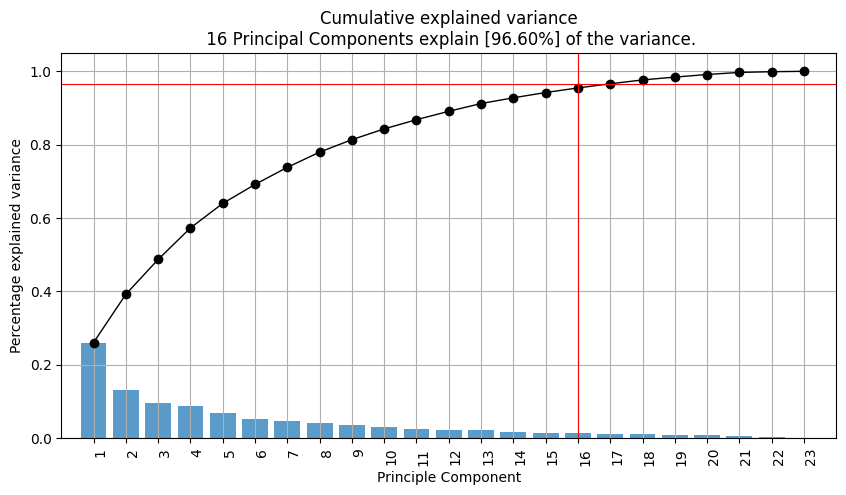

In [7]:
fig, ax = plt.subplots()
model.plot(fig=fig,ax=ax)
plt.show()

In [8]:
arrowdict = {
'fontsize': 22,
'color_text': "red",
'weight': None,
'alpha': 1,
'color_strong': 'red',
'color_weak': 'red',
'scale_factor': None
}

# RAM eater
#for std_multiplier in [2, 3]:
#    fig, ax = model.biplot(verbose=0, arrowdict=arrowdict)
#    out_t2 = scores_t2[scores_t2 > mean_t2 + std_t2*std_multiplier]
#    x_t2 = []
#    y_t2 = []
#    for i in range(len(out_t2)):
#        index = out_t2.index[i]
#        pcs = model.results['PC'].iloc[index]
#        x_t2.append(pcs.iloc[0])
#        y_t2.append(pcs.iloc[1])
#        ax.set_title(f"Threshold set to std x {std_multiplier}")
#        ax.plot(x_t2, y_t2, 'y*', zorder=100, markersize=17)
#        plt.show()